In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from itertools import repeat

In [3]:
df = pd.read_excel('Hotel_Matrix.xlsx', sheet_name='JUNE_RELIZEDREV_')
df.set_index('Room/Day', inplace=True)

df_array = df.iloc[:-6,:-4]
print(df_array.iloc[:5,:5])

           1      2       3       4       5
Room/Day                                   
130      NaN    NaN  129.40  199.72  271.00
131      NaN    NaN  206.33  180.72  276.27
132      NaN    NaN  143.78  197.24  198.36
133      NaN    NaN     NaN     NaN  395.00
134      NaN  224.0  221.00  212.63     NaN


In [5]:
arr = df_array.to_numpy()
arr = arr*1

In [7]:
room_distributions = {}
for i in range(0,len(df_array.index)):
    #print(f"Room{df_array.index[i]}: Minium Nightly Rate is {np.min(df_array.iloc[i,:])} and Maximum Nightly Rate is {np.max(df_array.iloc[i,:])}")
    room_number = df_array.index[i]
    row = df_array.iloc[i,:]
    room_sd = np.std(row)
    room_mu = np.mean(row)
    room_distributions[room_number] = [room_mu,room_sd]

    df_array.iloc[i,:] = (row - room_mu)/room_sd
        
#df_array.replace(np.nan,0,inplace=True)
central_tendencies = room_distributions
df_array

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Room/Day,,,,,,,,,,,,,,,,,,,,,
130,NaN,NaN,-1.105418,-0.316281,0.483630,1.628283,2.301609,0.281632,0.281632,-0.212140,...,0.078625,NaN,NaN,-0.324361,-0.935291,-0.212140,NaN,1.942390,0.867762,NaN
131,NaN,NaN,-0.705058,-0.922867,-0.110231,0.532648,0.323684,NaN,NaN,-0.682351,...,NaN,-0.906878,NaN,-0.767399,-0.956206,0.015045,1.716008,3.042760,0.848517,NaN
132,NaN,NaN,-0.470727,-0.082386,-0.074250,1.535776,1.310587,NaN,NaN,0.947380,...,0.176654,NaN,NaN,-1.515166,-1.515166,-1.515166,-1.515166,2.182285,0.633496,NaN
133,NaN,NaN,NaN,NaN,0.667020,0.946598,1.026478,0.597126,NaN,-1.190178,...,0.696975,NaN,-1.290027,-1.290027,-1.290027,NaN,NaN,1.106357,NaN,1.175853
134,NaN,-0.335361,-0.354026,-0.406101,NaN,0.359908,2.536864,-0.092717,NaN,-0.428686,...,2.657253,-1.237501,-1.237501,-0.490902,-0.490902,-0.777658,NaN,1.593351,0.361464,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,NaN,NaN,NaN,NaN,NaN,NaN,-0.760470,NaN,NaN,NaN,...,-0.652365,NaN,NaN,NaN,NaN,NaN,NaN,1.412836,NaN,NaN
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.732051,NaN,NaN,NaN,NaN,NaN,-0.577350,-0.577350,-0.577350,NaN
512,NaN,NaN,NaN,NaN,NaN,NaN,1.398429,NaN,NaN,NaN,...,-0.881692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.516737,NaN


In [9]:
DoW = {}
DoW['Sunday'] = df_array.iloc[:,[0,7,14,21,28]]
DoW['Monday'] = df_array.iloc[:,[1,8,15,22,29]]
DoW['Tuesday'] = df_array.iloc[:,[2,9,16,23]]
DoW['Wednesday'] = df_array.iloc[:,[3,10,17,24]]
DoW['Thursday'] = df_array.iloc[:,[4,11,18,25]]
DoW['Friday'] = df_array.iloc[:,[5,12,19,26]]
DoW['Saturday'] = df_array.iloc[:,[6,13,20,27]]
print(DoW['Sunday'])

           1         8        15        22        29
Room/Day                                            
130      NaN  0.281632 -0.492692       NaN  0.867762
131      NaN       NaN       NaN -0.906878  0.848517
132      NaN       NaN -0.098657       NaN  0.633496
133      NaN  0.597126       NaN       NaN       NaN
134      NaN -0.092717       NaN -1.237501  0.361464
...       ..       ...       ...       ...       ...
510      NaN       NaN       NaN       NaN       NaN
511      NaN       NaN       NaN       NaN -0.577350
512      NaN       NaN       NaN       NaN -0.516737
513      NaN       NaN       NaN       NaN  0.100401
514      NaN       NaN       NaN       NaN       NaN

[124 rows x 5 columns]


<Axes: >

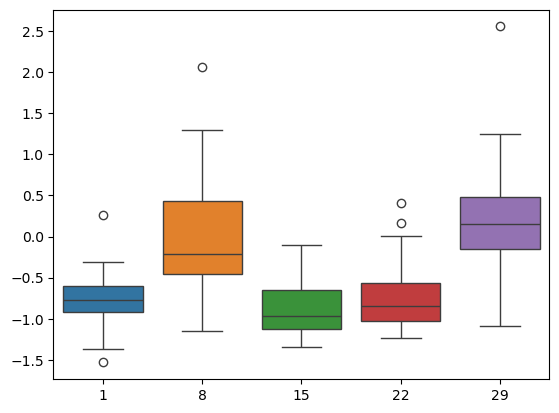

In [11]:
sns.boxplot(DoW['Sunday'])
#sns.boxplot(DoW['Monday'])
#sns.boxplot(DoW['Tuesday'])
#sns.boxplot(DoW['Wednesday'])
#sns.boxplot(Dow['Thursday'])
#sns.boxplot(DoW['Friday'])
#sns.boxplot(DoW[Saturday'])

In [13]:
def AvgDaily_Occupancy():
    freq_missing = {}
    for x in ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']:
        try:
            first, second, third, fourth, fifth = np.sum(pd.isna(DoW[x]),axis=0)
            TotalMissing_ = first + second + third + fourth + fifth
        except:
            first, second, third, fourth = np.sum(pd.isna(DoW[x]),axis=0)
            TotalMissing_ = first + second + third + fourth
        Total_ = np.size(DoW[x])
        PercentMissing_ = TotalMissing_ / Total_
        freq_missing[x] = PercentMissing_
    return freq_missing
AvgDaily_Occupancy()

{'Sunday': 0.7532258064516129,
 'Monday': 0.7774193548387097,
 'Tuesday': 0.4334677419354839,
 'Wednesday': 0.5524193548387096,
 'Thursday': 0.5604838709677419,
 'Friday': 0.37298387096774194,
 'Saturday': 0.1875}

In [15]:
df3 = pd.read_excel('DAILY RATE WORKBOOK.xlsx', sheet_name='COMPLETED STAY')
df3

,ORIGIN_CODE,PAYMENT_METHOD,GUEST_NAME,ROOM_CATEGORY,RATE_CODE,CF_RATE_VARIANCE,ROOM,EXTERNAL_REFERENCE,OCCUPANCY,LENGTH_STAY,SHARE_AMOUNT,PRODUCTS,BEGIN_DATE,END_DATE,DATE,RESV_STATUS,RATE_CODE.1
0,CRS,AX,acampora,KDX3K,KGAR05,0.0,135.0,139SF123919,2.0,2.0,286,AFEE,04-JUN-25,06-JUN-25,4.0,CKOT,NaN
1,CRS,AX,acampora,KDX3K,KGAR05,0.0,135.0,139SF123919,2.0,2.0,447,AFEE,04-JUN-25,06-JUN-25,5.0,CKOT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PHONE,CA,Adamo,KDX3K,NaN,0.0,321.0,139SF131235,1.0,1.0,439,AFEE,28-JUN-25,29-JUN-25,28.0,CKOT,439.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,CRS,AX,Zirogiannis,KJX3K,NaN,0.0,306.0,139SF128938,2.0,2.0,199,NaN,24-JUN-25,26-JUN-25,24.0,CKOT,199.0
2763,CRS,AX,Zirogiannis,KJX3K,NaN,0.0,306.0,139SF128938,2.0,2.0,199,NaN,24-JUN-25,26-JUN-25,25.0,CKOT,199.0
2764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMENITY DAYS:,958,NaN,NaN,NaN,NaN,NaN


In [17]:
available_rooms = df3["ROOM"].unique()
available_rooms = available_rooms[np.isnan(available_rooms)==False].tolist()
available_types = []
for i in available_rooms:
    j = pd.unique(df3.ROOM_CATEGORY[df3.ROOM==i]).tolist()
    available_types.append(str(*j))
#available_types
#list(zip(available_rooms,available_types))

In [19]:
df_array.insert(0, "Type", available_types)
df_sorted = df_array.sort_values(by='Type')
below_mean = df_sorted.replace(np.nan,100,inplace=False)
#below_mean

In [21]:
X = below_mean
try:
    # Drop NaN groups if not needed
    df_sub = X.dropna(subset=['Type'])

    # Get unique categories and sort for consistent output
    categories = df_sub['Type'].to_numpy()
    unique_cats, inverse_idx = np.unique(categories, return_inverse=True)

    # Create a dictionary of small DataFrames
    grouped_dfs = {
        cat: df_sub.iloc[inverse_idx == i].reset_index(drop=True)
        for i, cat in enumerate(unique_cats)
    }

    #print("\nResult: Dictionary of small DataFrames")
    #for cat, sub_df in grouped_dfs.items():
    #    print(f"\nGroup '{cat}':")
    #   print(sub_df)

except Exception as e:
    print(f"Error while splitting: {e}")

In [27]:
occupancy = []
condensed = {}
cat = [i for i in grouped_dfs.keys()]
for j in range(0,14):
    l = []
    freq = []
    ar = grouped_dfs[cat[j]]
    for i in range(1,31): 
        v_hat = ar.iloc[:,i]
        count = len(v_hat[v_hat!=100])
        if count == 0:
            l.append(-1.2)                                #replacing unoccupied rooms with z-score representing total occupancy between 20% - 70%
        else:
            l.append(sum(v_hat[v_hat!=100])/count)
    occupancy.append(count / len(v_hat))
    condensed[str(cat[j])] = l

std_by_roomtype = pd.DataFrame(condensed)
std_by_roomtype

,KDA3K,KDX3K,KDX3KX,KDX4QQ,KJX3K,KJX4K,KNA2Q,KNX2D,KNX2K,KNX4QQ,KSP3K,KSP4K,KSX4Q,KSX5K
0,-0.818003,0.258437,-1.200000,-1.200000,-1.200000,-0.728392,-1.200000,-0.607223,-0.895655,-1.089019,-1.200000,-1.200000,-0.308475,-1.200000
1,-0.766618,-0.769880,-1.200000,-1.200000,-1.200000,-1.200000,-0.592121,-1.200000,-0.895655,-0.485505,-1.200000,-1.200000,-0.999479,-1.200000
2,-0.719576,-0.666156,-1.200000,-0.603135,-1.200000,-1.200000,-0.472401,-1.200000,-0.960033,-0.353192,-0.470727,-1.200000,-0.999479,-1.200000
3,0.045916,-0.197850,-0.543235,-0.654500,-0.503852,-0.327955,-1.200000,-1.200000,-0.686134,-0.385723,0.143159,-1.200000,-0.220771,0.694056
4,0.045916,-0.077737,-1.200000,0.560681,0.042461,1.654553,-1.200000,-0.491768,0.283548,-0.023007,-0.116870,0.667020,0.917300,-1.200000
5,1.117106,1.359796,1.249710,1.091580,1.131825,0.609353,0.474903,1.802817,1.446463,1.245824,1.859872,1.411513,2.130717,1.204017
6,1.209381,1.324065,1.597370,0.429559,2.123670,1.013476,1.044985,1.793150,1.457986,1.298722,1.947613,0.746280,1.090271,1.596016
7,-1.200000,-0.121419,0.965906,-1.200000,0.571836,-0.276987,-1.200000,-0.824841,0.172701,0.187423,-1.200000,0.597126,-0.053666,-0.979631
8,-1.200000,-0.519039,0.338138,-0.372305,-0.590361,-0.263672,-1.200000,-0.312386,-0.214256,-0.541978,-1.200000,-1.200000,-0.334959,-1.066776
9,-0.964750,-0.470686,-0.481448,-0.351844,-0.520328,-0.240636,-0.578977,-0.452129,-0.323946,-0.563724,0.128231,-0.892786,-0.681565,-1.066776


In [29]:
dfx = pd.read_excel('Hotel_Matrix.xlsx', sheet_name='JUNE_RELIZEDREV_')
dx = dfx.iloc[:-6,:-4]
dx.replace(np.nan,0,inplace=True)
new_col = []
for i in range(0,29):
    new_col.append(sum(dx.iloc[:,i]))

monthly_totals = pd.Series(new_col)
Q3_deviation_target = pd.Series(repeat(1.96,30))
std_by_roomtype["Total_Rev"] = monthly_totals
std_by_roomtype["Target"] = Q3_deviation_target
std_by_roomtype
std_by_roomtype.to_excel('output.xlsx', index=True)

<Axes: ylabel='Count'>

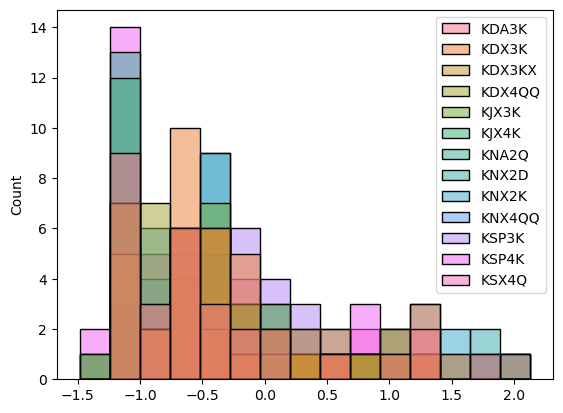

In [31]:
sns.histplot(std_by_roomtype.iloc[:,:-3])

In [32]:
model = ols("Target ~ KDA3K + KDX3K + KDX3KX + KDX4QQ + KJX3K + KJX4K + KNA2Q + KNX2D + KNX2K + KNX4QQ + KSP3K + KSP4K + KSX4Q + KSX5K", data = std_by_roomtype).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                  -32913.733
Model:                            OLS   Adj. R-squared:             -63634.151
Method:                 Least Squares   F-statistic:                    -1.071
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               1.00
Time:                        21:30:41   Log-Likelihood:                 882.72
No. Observations:                  30   AIC:                            -1735.
Df Residuals:                      15   BIC:                            -1714.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9600   2.24e-14   8.76e+13      0.000       1.960       1.960
KDA3K       4.108e-15   4.58e-14      0.090      0.930   -9.34e-14    1.02e-13
KDX3K       2.442e-15   6.21e-14      0.039      0.969    -1.3e-13    1.35e-13
KDX3KX      3.553e-15    2.6e-14      0.137      0.893   -5.18e-14    5.89e-14
KDX4QQ      3.553e-15   4.46e-14      0.080      0.938   -9.15e-14    9.86e-14
KJX3K       4.108e-15   5.95e-14      0.069      0.946   -1.23e-13    1.31e-13
KJX4K       4.219e-15   3.11e-14      0.136      0.894   -6.21e-14    7.06e-14
KNA2Q       4.566e-15   4.54e-14      0.101      0.921   -9.21e-14    1.01e-13
KNX2D       3.664e-15   3.32e-14      0.110      0.914   -6.72e-14    7.45e-14
KNX2K       2.665e-15   6.03e-14      0.044      0.965   -1.26e-13    1.31e-13
KNX4QQ      3.941e-15   7.17e-14      0.055      0.957   -1.49e-13    1.57e-13
KSP3K       2.415e-15   2.67e-14      0.090      0.929   -5.45e-14    5.93e-14
KSP4K       4.663e-15   2.16e-14      0.216      0.832   -4.14e-14    5.07e-14
KSX4Q       2.998e-15   5.93e-14      0.051      0.960   -1.23e-13    1.29e-13
KSX5K       3.664e-15    2.6e-14      0.141      0.890   -5.18e-14    5.91e-14
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.531
Skew:                          -1.371   Prob(JB):                      0.00517
Kurtosis:                       3.953   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

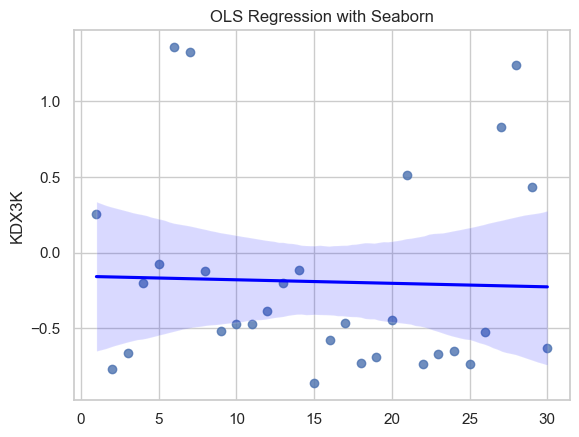

In [141]:
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
sns.set(style="whitegrid")
sns.regplot(x= days, y ='KDA3K', data=std_by_roomtype, ci=95, line_kws={"color": "red"})
sns.regplot(x=days, y ='KDX3K', data=std_by_roomtype, ci=95, line_kws={"color": "blue"})
sns.regplot(x=days, y ='KDX3KX', data=std_by_roomtype, ci=95, line_kws={"color": "violet"})
sns.regplot(x=days, y ='KDX4QQ', data=std_by_roomtype, ci=95, line_kws={"color": "green"})
sns.regplot(x=days, y='KJX3K', data=std_by_roomtype, ci=95, line_kws={"color": "yellow"})
sns.regplot(x=days, y ='KJX4K', data=std_by_roomtype, ci=95, line_kws={"color": "orange"})
sns.regplot(x=days, y = 'KNA2Q', data=std_by_roomtype, ci=95, line_kws={"color": "black"})
sns.regplot(x=days, y = 'KNX2D', data=std_by_roomtype, ci=95, line_kws={"color": "pink"})
sns.regplot(x=days, y ='KNX2K', data=std_by_roomtype, ci=95, line_kws={"color": "indigo"})
sns.regplot(x=days, y ='KNX4QQ', data=std_by_roomtype, ci=95, line_kws={"color": "purple"})
sns.regplot(x=days, y ='KSP3K', data=std_by_roomtype, ci=95, line_kws={"color": "teal"})
sns.regplot(x=days, y='KSP4K', data=std_by_roomtype, ci=95, line_kws={"color": "crimson"})
sns.regplot(x=days, y='KSX4Q', data=std_by_roomtype, ci=95, line_kws={"color": "gray"})
sns.regplot(x=days, y='KSX5K', data=std_by_roomtype, ci=95, line_kws={"color": "brown"})

# Show the plot
plt.title("OLS Regression with Seaborn")
plt.show()

,ORIGIN_CODE,PAYMENT_METHOD,GUEST_NAME,ROOM_CATEGORY,RATE_CODE,CF_RATE_VARIANCE,ROOM,EXTERNAL_REFERENCE,OCCUPANCY,LENGTH_STAY,SHARE_AMOUNT,PRODUCTS,BEGIN_DATE,END_DATE,DATE,RESV_STATUS,RATE_CODE.1
0,CRS,AX,acampora,KDX3K,KGAR05,0.0,135.0,139SF123919,2.0,2.0,286,AFEE,04-JUN-25,06-JUN-25,4.0,CKOT,NaN
1,CRS,AX,acampora,KDX3K,KGAR05,0.0,135.0,139SF123919,2.0,2.0,447,AFEE,04-JUN-25,06-JUN-25,5.0,CKOT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PHONE,CA,Adamo,KDX3K,NaN,0.0,321.0,139SF131235,1.0,1.0,439,AFEE,28-JUN-25,29-JUN-25,28.0,CKOT,439.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,CRS,AX,Zirogiannis,KJX3K,NaN,0.0,306.0,139SF128938,2.0,2.0,199,NaN,24-JUN-25,26-JUN-25,24.0,CKOT,199.0
2763,CRS,AX,Zirogiannis,KJX3K,NaN,0.0,306.0,139SF128938,2.0,2.0,199,NaN,24-JUN-25,26-JUN-25,25.0,CKOT,199.0
2764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMENITY DAYS:,958,NaN,NaN,NaN,NaN,NaN
